In [1]:
import pandas as pd
import numpy as np
import scanpy as sc #pip install scanpy
import anndata
import scipy

import sys,os
import scvi

Global seed set to 0


In [2]:
import matplotlib
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import rc_context
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.stats.multitest import multipletests

sc.logging.print_header()
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.6 anndata==0.9.2 umap==0.5.4 numpy==1.24.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.2 pynndescent==0.5.10


In [3]:
adata = sc.read_h5ad('/home/jupyter/tmpmount/vasculature/nuclei/nuclei_datasets/whole_nuclei_objects/all_org_nuclei_scvi.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 976044 × 14675
    obs: 'subject', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'id', 'library_id', 'batch', 'brain_region', 'age_death', 'msex', 'pmi', 'ADdiag2types', 'percent.mt', 'percent.rp', 'celltype', 'cellsubtype', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'kit', 'study', 'organ', 'cell_or_nuclei', 'ID', 'Study', 'PoolDon', 'DonorPool', 'scDonor_snBatch', 'lung_cell_states', 'cell_state', 'lung_region', 'sample', 'sex', 'suspension_type', 'SampleID', 'PatientID', 'snRNAPreparation', 'RNA_snn_res.0.5', 'seurat_clusters', 'oricluster', 'newcluster', 'Dataset', 'development_stage', 'pancreas_cell_states', 'cell_type', 'skeletal_muscle_cell_states', 'suspension_uuid', 'liver_cell_states', 'liver_region', 'age_group', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'scrublet_score', 'heart_cell_states', 'heart_region', 'Cell', 'Treat', 'Sample', 'Region', 'nCount_S

In [5]:
adata_vasc = adata[adata.obs["leiden_1"].isin(['3', '5', '8', '17', '22', '25', '52'])]

/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


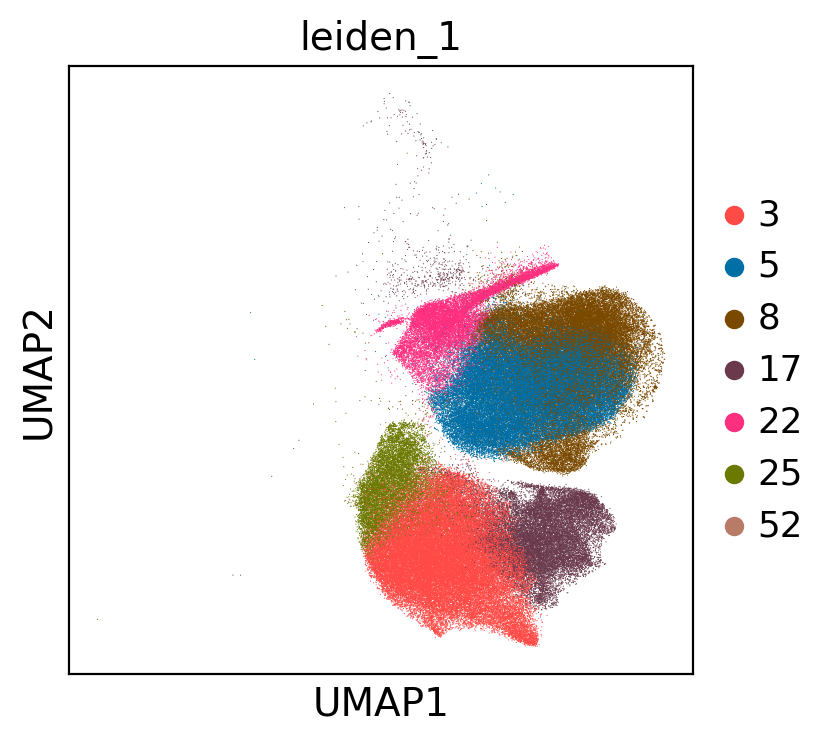

In [6]:
sc.pl.umap(adata_vasc, color = 'leiden_1')

In [7]:
adata_vasc.obs.organ

SM_171013Tsa.CTACCCAGTGCAACGA-3     brain
SM_171013Tsa.AACTTTCTCTGCAGTA-7     brain
SM_171013Tsa.AGATTGCGTGCAGTAG-7     brain
SM_171013Tsa.CGCGGTACACGCATCG-13    brain
SM_171013Tsa.CTCTAATAGAAACCAT-15    brain
                                    ...  
Thalamus.CAAAGAATCTGAGAAA-47-1      brain
Thalamus.CGACAGCGTTGCTGAT-47-1      brain
Thalamus.GGAAGTGAGCTCATAC-47-1      brain
Thalamus.TCGTGGGTCTATCCAT-47-1      brain
Thalamus.TTACAGGCACACCTGG-47-1      brain
Name: organ, Length: 190228, dtype: category
Categories (7, object): ['Heart', 'Kidney', 'Liver', 'Lung', 'Pancreas', 'Skeletal_muscle', 'brain']

In [8]:
adata_vasc

View of AnnData object with n_obs × n_vars = 190228 × 14675
    obs: 'subject', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'id', 'library_id', 'batch', 'brain_region', 'age_death', 'msex', 'pmi', 'ADdiag2types', 'percent.mt', 'percent.rp', 'celltype', 'cellsubtype', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'kit', 'study', 'organ', 'cell_or_nuclei', 'ID', 'Study', 'PoolDon', 'DonorPool', 'scDonor_snBatch', 'lung_cell_states', 'cell_state', 'lung_region', 'sample', 'sex', 'suspension_type', 'SampleID', 'PatientID', 'snRNAPreparation', 'RNA_snn_res.0.5', 'seurat_clusters', 'oricluster', 'newcluster', 'Dataset', 'development_stage', 'pancreas_cell_states', 'cell_type', 'skeletal_muscle_cell_states', 'suspension_uuid', 'liver_cell_states', 'liver_region', 'age_group', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'scrublet_score', 'heart_cell_states', 'heart_region', 'Cell', 'Treat', 'Sample', 'Region', '

In [9]:
#subset individual tissues with >10K cells
Heart = adata_vasc[adata_vasc.obs['organ'].isin(["Heart"])]
Kidney = adata_vasc[adata_vasc.obs['organ'].isin(["Kidney"])]
Liver = adata_vasc[adata_vasc.obs['organ'].isin(["Liver"])]
Lung = adata_vasc[adata_vasc.obs['organ'].isin(["Lung"])]
Pancreas = adata_vasc[adata_vasc.obs['organ'].isin(["Pancreas"])]
Skeletal_muscle = adata_vasc[adata_vasc.obs['organ'].isin(["Skeletal_muscle"])]
brain = adata_vasc[adata_vasc.obs['organ'].isin(["brain"])]

sc.pp.subsample(Heart, n_obs=min(20000, Heart.n_obs))
sc.pp.subsample(Kidney, n_obs=min(20000, Kidney.n_obs))
sc.pp.subsample(Liver, n_obs=min(20000, Liver.n_obs))
sc.pp.subsample(Lung, n_obs=min(20000, Lung.n_obs))
sc.pp.subsample(Pancreas, n_obs=min(20000, Pancreas.n_obs))
sc.pp.subsample(Skeletal_muscle, n_obs=min(20000, Skeletal_muscle.n_obs))
sc.pp.subsample(brain, n_obs=min(20000, brain.n_obs))

#concatenate individual objects
adata_vasc_subsample = sc.concat([Heart, Kidney, Liver, Lung, Pancreas, Skeletal_muscle, brain])

In [10]:
adata = adata_vasc_subsample

In [11]:
adata

AnnData object with n_obs × n_vars = 67421 × 14675
    obs: 'subject', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'id', 'library_id', 'batch', 'brain_region', 'age_death', 'msex', 'pmi', 'ADdiag2types', 'percent.mt', 'percent.rp', 'celltype', 'cellsubtype', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'kit', 'study', 'organ', 'cell_or_nuclei', 'ID', 'Study', 'PoolDon', 'DonorPool', 'scDonor_snBatch', 'lung_cell_states', 'cell_state', 'lung_region', 'sample', 'sex', 'suspension_type', 'SampleID', 'PatientID', 'snRNAPreparation', 'RNA_snn_res.0.5', 'seurat_clusters', 'oricluster', 'newcluster', 'Dataset', 'development_stage', 'pancreas_cell_states', 'cell_type', 'skeletal_muscle_cell_states', 'suspension_uuid', 'liver_cell_states', 'liver_region', 'age_group', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'scrublet_score', 'heart_cell_states', 'heart_region', 'Cell', 'Treat', 'Sample', 'Region', 'nCount_SC

# append the previous cellhint harmonised labels to this vas subset

In [12]:
df = pd.read_csv('/home/jupyter/tmpmount/vasculature/nuclei/nuclei_datasets/harmonised_labels_cellhint.csv', index_col= 'Unnamed: 0')
df

,reannotation,group,author_harmonised
TCACAAGGTTAACCTG-1-H0020_LV,Per2 ∈ Pericyte ∈ mural cell = Muscle_pericyte...,Group3,mural
GAACCTACAAACCTAC-1-HCAHeart7829977,Per1 ∈ Pericyte ∈ mural cell = Muscle_pericyte...,Group3,mural
CACCAAAAGGCTCTAT-1-H0020_septum,UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOL...,Group7,mural
AGTGCCGTCGACATCA-1-H0015_RA,NONE = NONE = endothelial cell of lymphatic ve...,Group1,lymphatic_ec
TTTACCATCAACGCTA-1-HCAHeart8287126,Per2 ∈ Pericyte ∈ mural cell = Muscle_pericyte...,Group3,mural
...,...,...,...
GTGTTAGGTCTAGTCA_25,NONE = NONE = NONE = NONE = NONE = NONE = NONE...,Group6,ec
TGAGCCGTCTTTCCTC_25,NONE = NONE = NONE = NONE = NONE = NONE = NONE...,Group6,ec
TGCTACCGTGGGTCAA_25,NONE = NONE = NONE = NONE = NONE = NONE = NONE...,Group6,ec
TTCTCCTCAGTCACTA_25,capEndo = Capillary = peritubular capillary en...,Group6,ec


In [13]:
# Check for duplicated values under the index
duplicated_values = df.index[df.index.duplicated()]
len(duplicated_values)

0

In [14]:
# Ensure index alignment
common_index = df.index.intersection(adata.obs_names)
common_index

Index(['GACTCTCAGCTTCTAG-1-H0025_septum', 'AGTCATGTCGTTTACT-1-H0035_RV',
       'CCTGTTGCAACGATCT-1-H0025_septum', 'CGGGTCAAGTGACTCT-1-HCAHeart7829976',
       'AACAACCCACGTACAT-1-H0015_LV', 'ATGACCACAGTCGGAA-1-H0026_RV',
       'CGGAGTCCAAAGCGGT-1-HCAHeart7833852',
       'GCTGCGATCAACCATG-1-HCAHeart7888926',
       'ACATGCAAGAGTCTTC-1-H0037_RA_corr', 'TGTCAGAGTCATCTAG-1-H0026_RV',
       ...
       'GATGAAACACCATCCT_25', 'GCATACAGTGTCCTCT_25', 'GGAATAATCACTTACT_25',
       'GGCTCGAAGGCCCGTT_25', 'GGTGTTATCCCACTTG_25', 'GTGTGCGCACCTATCC_25',
       'TGAGCCGTCTTTCCTC_25', 'TGCTACCGTGGGTCAA_25', 'TTCTCCTCAGTCACTA_25',
       'TTGACTTAGTGTGGCA_25'],
      dtype='object', length=24182)

In [15]:
df_subset = df.loc[common_index]
df_subset

,reannotation,group,author_harmonised
GACTCTCAGCTTCTAG-1-H0025_septum,Per1 ∈ Pericyte ∈ mural cell = Muscle_pericyte...,Group3,mural
AGTCATGTCGTTTACT-1-H0035_RV,vSMC = SMC = vascular associated smooth muscle...,Group5,mural
CCTGTTGCAACGATCT-1-H0025_septum,vSMC = SMC = vascular associated smooth muscle...,Group5,mural
CGGGTCAAGTGACTCT-1-HCAHeart7829976,capEndo = Capillary = peritubular capillary en...,Group6,ec
AACAACCCACGTACAT-1-H0015_LV,Per1 ∈ Pericyte ∈ mural cell = Muscle_pericyte...,Group3,mural
...,...,...,...
GTGTGCGCACCTATCC_25,NONE = NONE = NONE = NONE = NONE = NONE = NONE...,Group6,ec
TGAGCCGTCTTTCCTC_25,NONE = NONE = NONE = NONE = NONE = NONE = NONE...,Group6,ec
TGCTACCGTGGGTCAA_25,NONE = NONE = NONE = NONE = NONE = NONE = NONE...,Group6,ec
TTCTCCTCAGTCACTA_25,capEndo = Capillary = peritubular capillary en...,Group6,ec


In [17]:
print("Length of common index:", len(common_index))
print("Length of adata.obs:", len(adata.obs))

Length of common index: 24182
Length of adata.obs: 67421


In [18]:
# Merge the DataFrame with adata.obs based on common indices
adata.obs = pd.merge(adata.obs, df_subset, left_index=True, right_index=True, how='left')

In [19]:
adata

AnnData object with n_obs × n_vars = 67421 × 14675
    obs: 'subject', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'id', 'library_id', 'batch', 'brain_region', 'age_death', 'msex', 'pmi', 'ADdiag2types', 'percent.mt', 'percent.rp', 'celltype', 'cellsubtype', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'kit', 'study', 'organ', 'cell_or_nuclei', 'ID', 'Study', 'PoolDon', 'DonorPool', 'scDonor_snBatch', 'lung_cell_states', 'cell_state', 'lung_region', 'sample', 'sex', 'suspension_type', 'SampleID', 'PatientID', 'snRNAPreparation', 'RNA_snn_res.0.5', 'seurat_clusters', 'oricluster', 'newcluster', 'Dataset', 'development_stage', 'pancreas_cell_states', 'cell_type', 'skeletal_muscle_cell_states', 'suspension_uuid', 'liver_cell_states', 'liver_region', 'age_group', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'scrublet_score', 'heart_cell_states', 'heart_region', 'Cell', 'Treat', 'Sample', 'Region', 'nCount_SC

/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


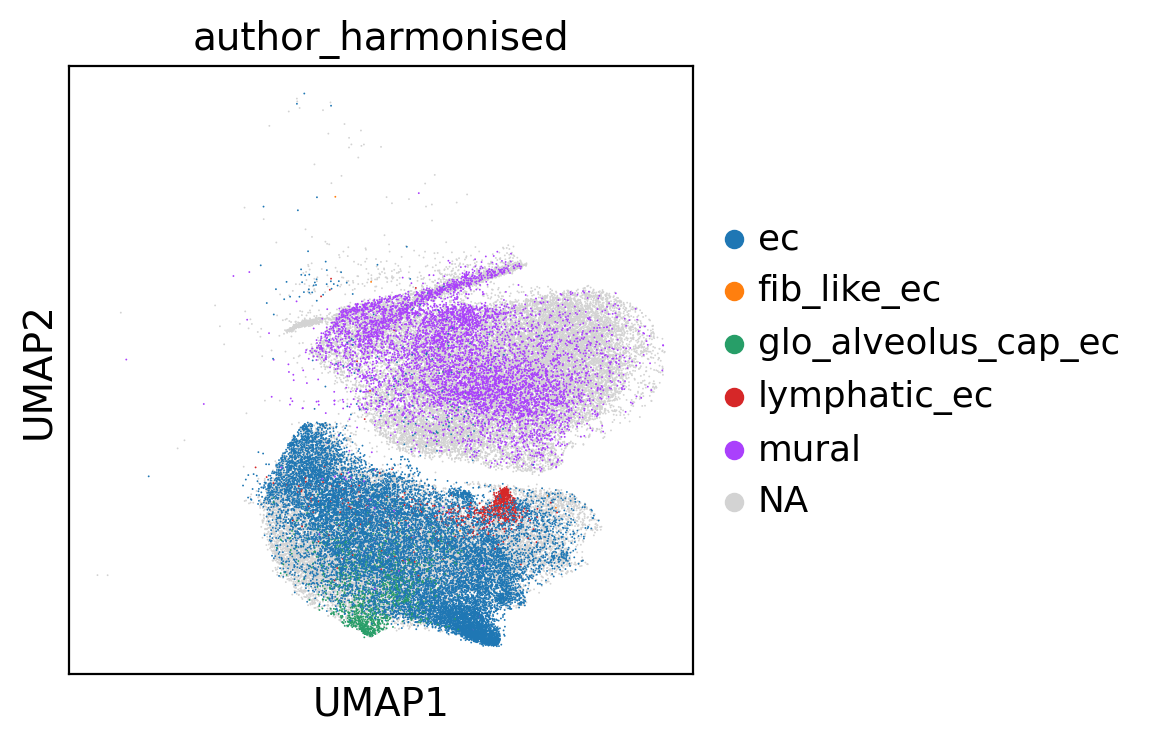

In [20]:
sc.pl.umap(adata, color = 'author_harmonised')

In [24]:
nan_values = adata[adata.obs.author_harmonised.isna()]
nan_values.obs.organ

CCTTACGTCTACTATC-1-HCAHeart7664653    Heart
AGGCCGTCAGCGATCC-1-HCAHeart7829979    Heart
CGACAGCAGTTGTCGT-1-H0037_LV           Heart
ACGCCGAGTCCATCCT-1-HCAHeart7888928    Heart
AACCCAAAGGACAGCT-1-H0025_RV           Heart
                                      ...  
31719                                 brain
Hippocampus.CTACAGAGTGGTATGG-38-1     brain
5652                                  brain
32494                                 brain
D20-125069.4207                       brain
Name: organ, Length: 43239, dtype: category
Categories (7, object): ['Heart', 'Kidney', 'Liver', 'Lung', 'Pancreas', 'Skeletal_muscle', 'brain']

In [21]:
pd.crosstab(adata.obs.organ, adata.obs.author_harmonised)

author_harmonised,ec,fib_like_ec,glo_alveolus_cap_ec,lymphatic_ec,mural
organ,,,,,
Heart,596,8,0,13,1400
Kidney,5190,0,824,60,1286
Liver,4276,0,0,0,215
Lung,1930,0,499,658,979
Pancreas,1379,0,0,0,0
Skeletal_muscle,2131,0,0,0,2157
brain,334,0,0,0,247


In [25]:
adata.write('/home/jupyter/tmpmount/vasculature/nuclei/nuclei_datasets/whole_nuclei_objects/vasc_subset.h5ad', compression = 'gzip')